In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals


In [ ]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import itertools
# import os
# import shutil
# import random
# import glob
from matplotlib import pyplot as plt
# import warnings
import seaborn as sns
# warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
# Create train, validation and test subsets
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
  os.makedir('train/dog')
  os.makedir('train/cat')
  os.makedir('valid/dog')
  os.makedir('valid/cat')
  os.makedir('test/dog')
  os.makedir('test/cat')

  for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
  for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
  for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')
  for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dog')
  for c in random.sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cat')
  for c in random.sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dog')

os.chdir('../../')


NameError: ignored

In [ ]:
#set paths 
train_path = '/content/drive/MyDrive/Cats_Dogs/train'
valid_path = '/content/drive/MyDrive/Cats_Dogs/valid'
test_path = '/content/drive/MyDrive/Cats_Dogs/test'

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
plotImages(img)
print(labels)

Import the pre-trained model

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
vgg16_model.summary()

In [ ]:
# Create sequential model with layers set to layers of vgg16
model = keras.Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [ ]:
# Prevent alteration of model
for layer in model.layers:
  layer.trainable = False

In [ ]:
# add output layer
model.add(layers.Dense(units=2, activation = 'softmax'))

In [ ]:
# compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#set paths 
test_path2 = '/content/drive/MyDrive/Cats_Dogs/test2'

In [ ]:
# 
# 
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, classes=None, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
# fit model
model.fit(
        train_batches,
        steps_per_epoch=100,
        epochs=5,
        validation_data=valid_batches,
        validation_steps=20)

Epoch 1/5
100/100 [==============================] - 615s 6s/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 0.0728 - val_accuracy: 0.9850
Epoch 2/5
100/100 [==============================] - 615s 6s/step - loss: 7.1102e-04 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9800
Epoch 3/5
100/100 [==============================] - 613s 6s/step - loss: 4.1456e-04 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9800
Epoch 4/5
100/100 [==============================] - 613s 6s/step - loss: 3.1864e-04 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9800
Epoch 5/5
100/100 [==============================] - 612s 6s/step - loss: 2.5488e-04 - accuracy: 1.0000 - val_loss: 0.0763 - val_accuracy: 0.9800


In [ ]:
# Predict images in test set with model 
predictions = model.predict(test_batches, verbose=0)

In [ ]:
print(type(predictions))

<class 'numpy.ndarray'>


In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_batches.class_indices

In [ ]:
x = []
for i in range(len(predictions)):
  if predictions[i][0]>=predictions[i][1]:
    x.append(0)
  else:
    x.append(1)
answers = np.array(x)
answers

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

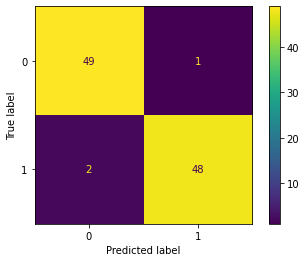

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_batches.classes, answers)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
